In [48]:
#import and load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, classification_report
)

import warnings
warnings.filterwarnings('ignore')

In [49]:
# Load dataset
try:
    df = pd.read_csv('loan_data.csv')
    print(f"Data Loaded. Initial Shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'loan_data.csv' not found.")

print(df.head())


Data Loaded. Initial Shape: (381, 13)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Ur

In [50]:
df.shape

(381, 13)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [52]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
df['Credit_History'] = df['Credit_History'].fillna(0)

df['Loan_Status'] = df['Loan_Status'].map({'Y': 0, 'N': 1})


In [54]:
# Replace '3+' with 3
df['Dependents'] = df['Dependents'].replace('3+', 3)

# Fill missing values (most common value)
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

# Convert to integer
df['Dependents'] = df['Dependents'].astype(int)


num_cols = [
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term'
]

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = [
    'Gender',
    'Married',
    'Education',
    'Self_Employed',
    'Property_Area'
]

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df = df.dropna(subset=['Loan_Status'])


In [55]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [77]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Debt_to_Income,Estimated_EMI,EMI_to_Income
count,381,381.000000,381.000000,381.000000,381.000000,381.000000,3.810000e+02,3.810000e+02,3.810000e+02,381.000000,381.000000,381.000000,381.000000,3.810000e+02,3.810000e+02,381.000000,3.810000e+02
unique,381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP001003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.776903,0.598425,0.666667,0.270341,0.091864,1.282147e-16,-3.963001e-17,-1.049030e-16,341.417323,0.771654,1.052493,0.288714,-1.864942e-17,9.790943e-17,0.354850,-4.662354e-17
std,NaN,0.416870,0.490861,0.987643,0.444720,0.289213,1.001315e+00,1.001315e+00,1.001315e+00,67.625957,0.420319,0.779592,0.453761,1.001315e+00,1.001315e+00,0.498731,1.001315e+00
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-2.418877e+00,-5.463709e-01,-3.389221e+00,12.000000,0.000000,0.000000,0.000000,-1.414776e+00,-2.863472e+00,0.025000,-9.223208e-01
25%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,-6.910297e-01,-5.463709e-01,-5.291748e-01,360.000000,1.000000,0.000000,0.000000,-4.942718e-01,-5.416035e-01,0.256250,-2.688609e-01
50%,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,-1.740860e-01,-1.258801e-01,1.770094e-01,360.000000,1.000000,1.000000,0.000000,-1.065168e-01,3.547202e-02,0.311111,-1.183722e-01
75%,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,4.994218e-01,3.159989e-01,7.772660e-01,360.000000,1.000000,2.000000,1.000000,2.663245e-01,5.967200e-01,0.363889,4.801249e-02


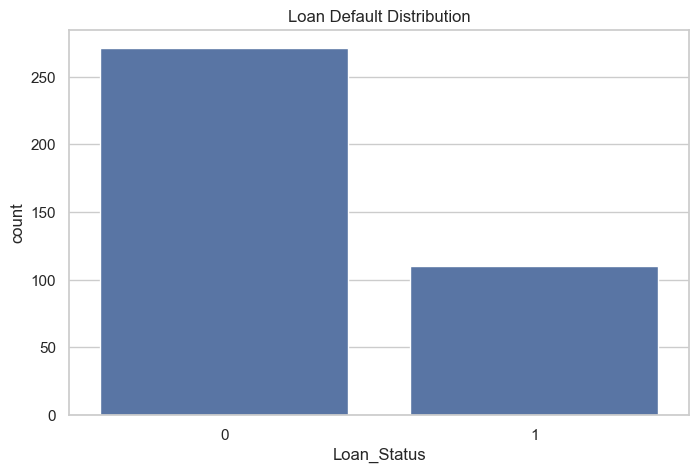

In [56]:
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Default Distribution")
plt.show()


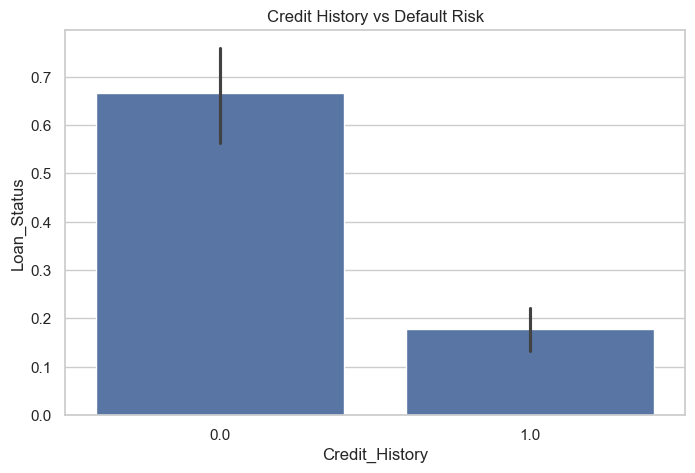

In [57]:
sns.barplot(x='Credit_History', y='Loan_Status', data=df)
plt.title("Credit History vs Default Risk")
plt.show()


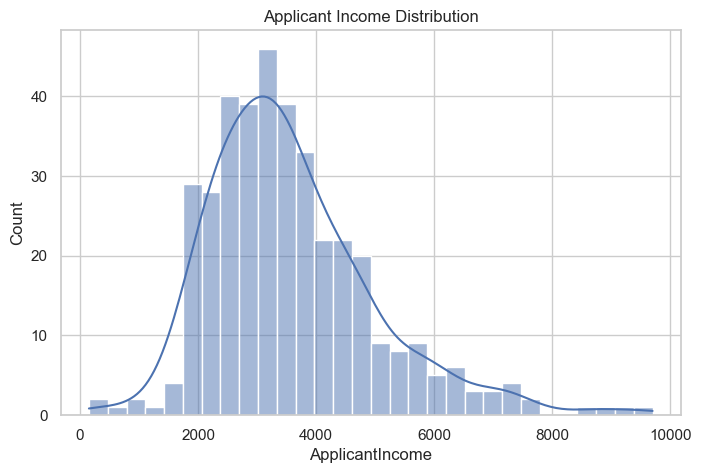

In [58]:
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title("Applicant Income Distribution")
plt.show()


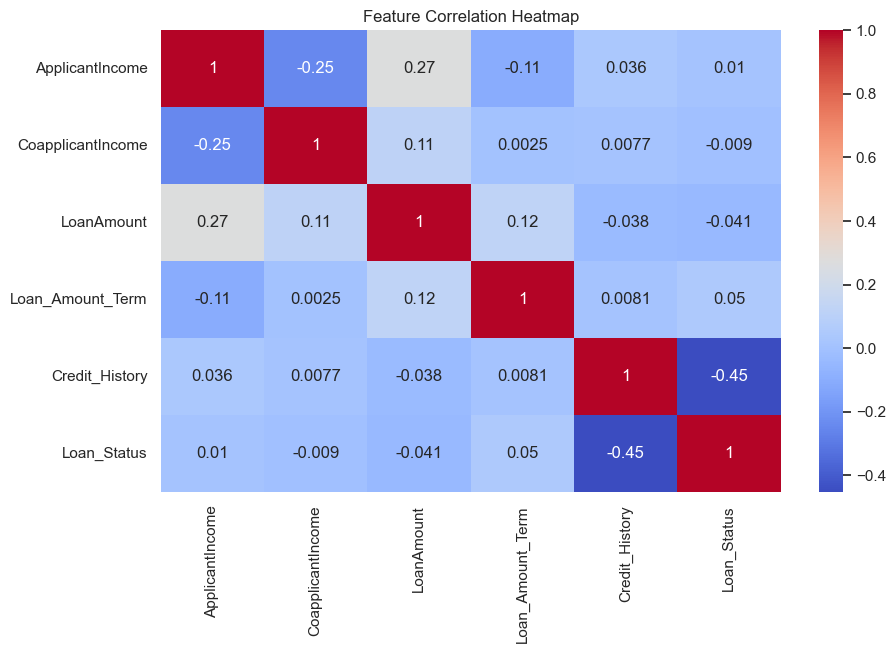

In [59]:
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title("Feature Correlation Heatmap")
plt.show()



In [60]:
# Total Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Debt to Income Ratio
df['Debt_to_Income'] = df['LoanAmount'] / df['Total_Income']

# Estimated EMI
df['Estimated_EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']

# EMI to Income Ratio
df['EMI_to_Income'] = df['Estimated_EMI'] / df['Total_Income']


In [61]:
cat_cols = [
    'Gender',
    'Married',
    'Education',
    'Self_Employed',
    'Property_Area'
]

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [62]:
scaler = StandardScaler()

num_cols = [
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Total_Income',
    'Debt_to_Income',
    'EMI_to_Income'
]

df[num_cols] = scaler.fit_transform(df[num_cols])


In [63]:
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [64]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [65]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [68]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [69]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [70]:
evaluate_model(log_model, X_test, y_test)


Accuracy: 0.7272727272727273
Precision: 0.5294117647058824
Recall: 0.4090909090909091
ROC-AUC: 0.7322314049586777

Confusion Matrix:
 [[47  8]
 [13  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.82        55
           1       0.53      0.41      0.46        22

    accuracy                           0.73        77
   macro avg       0.66      0.63      0.64        77
weighted avg       0.71      0.73      0.72        77



In [71]:
evaluate_model(dt_model, X_test, y_test)


Accuracy: 0.6883116883116883
Precision: 0.4375
Recall: 0.3181818181818182
ROC-AUC: 0.47066115702479333

Confusion Matrix:
 [[46  9]
 [15  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79        55
           1       0.44      0.32      0.37        22

    accuracy                           0.69        77
   macro avg       0.60      0.58      0.58        77
weighted avg       0.66      0.69      0.67        77



In [72]:
evaluate_model(rf_model, X_test, y_test)


Accuracy: 0.7402597402597403
Precision: 0.5625
Recall: 0.4090909090909091
ROC-AUC: 0.7537190082644628

Confusion Matrix:
 [[48  7]
 [13  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        55
           1       0.56      0.41      0.47        22

    accuracy                           0.74        77
   macro avg       0.67      0.64      0.65        77
weighted avg       0.72      0.74      0.73        77



In [73]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
9,Credit_History,0.167834
12,Debt_to_Income,0.115635
11,Total_Income,0.110454
14,EMI_to_Income,0.095950
5,ApplicantIncome,0.091733
7,LoanAmount,0.089991
13,Estimated_EMI,0.082865
6,CoapplicantIncome,0.081367
10,Property_Area,0.040043
8,Loan_Amount_Term,0.033279


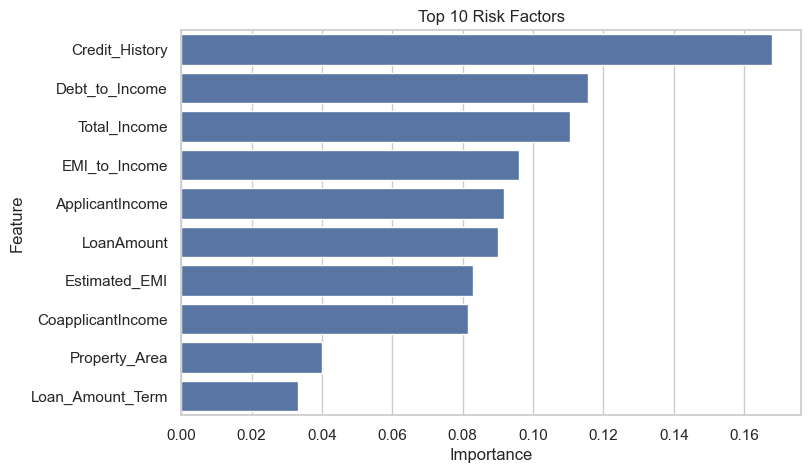

In [74]:
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title("Top 10 Risk Factors")
plt.show()


In [76]:
# Key Business Insights
# Credit history is the strongest predictor of loan default
# High EMI-to-income ratio significantly increases default risk
# Applicants with stable income are less likely to default
# Random Forest model provides the best risk detection performance
